# Business Intelligence Assignment 7 

### Groupname Powersmilling - This assignment was made by Yakubu, Kristoffer and Yosuke

# Part 1: Data processing

### First step is to import the libraries 

In [1]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import random

Populating the interactive namespace from numpy and matplotlib


##### As stated in our readme documentation our objective is to build and evalate a machine learning model based on housing data set. The predicting labels (classes) will be done splitting in 5 categories. 
- Below -60 % Either wrong data or a very unlucky time to sell.  
- Below 0 %.  - Sold below market value.  
- Sold just at market value.  
- Sold above market value. 
- Above 100 %. Either wrong data or a very lucky time to sell. 

##### The column we will split is price_change_in_pct, which we believe is the best indicator for measuring price changes. 

In [2]:
df = pd.read_csv('../adjustfinallist.csv')

In [3]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [4]:
df.head()

,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude,zip_nr,sell_year,dist_from_cph_center
0,"Ved Volden 5, 5. TV",1425 København K,4000000,2017-05-23,Alm. Salg,43956.0,3,Lejlighed,91.0,1938.0,0.0,55.671769,12.593629,1425,2017,2.851984
1,"Rådhusstræde 4C, 1",1466 København K,4895000,2017-05-18,Alm. Salg,46619.0,3,Lejlighed,105.0,1796.0,0.0,55.676839,12.573689,1466,2017,0.600778
2,"Store Kongensgade 112A, 3",1264 København K,250000,2017-05-15,Andet,1851.0,2,Lejlighed,135.0,1860.0,0.0,55.687079,12.590441,1264,2017,2.731312
3,"Amaliegade 13G, 2",1256 København K,7375000,2017-05-15,Alm. Salg,75255.0,3,Lejlighed,98.0,1948.0,9.0,55.683439,12.591287,1256,2017,2.673396
4,"Borgergade 144, 3. TH",1300 København K,5825000,2017-10-05,Alm. Salg,57673.0,3,Lejlighed,101.0,1854.0,3.0,55.687623,12.588744,1300,2017,2.590746


In [5]:
df.describe()

,price,price_per_sqm,no_rooms,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude,zip_nr,sell_year,dist_from_cph_center
count,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06
mean,1.437446e+06,1.122160e+04,4.631876e+00,1.336675e+02,1.956144e+03,1.745242e+03,5.588472e+01,1.061821e+01,6.120533e+03,2.006601e+03,2.348664e+02
std,1.851221e+06,1.489797e+04,1.723463e+00,5.420673e+01,4.334513e+01,1.169178e+06,6.391005e-01,1.392883e+00,2.266808e+03,6.950279e+00,1.456680e+02
min,5.001000e+03,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+03,-1.000000e+02,5.456327e+01,8.087187e+00,1.050000e+03,1.992000e+03,1.881531e-01
25%,5.920000e+05,4.918000e+03,4.000000e+00,9.800000e+01,1.935000e+03,-1.000000e+00,5.545921e+01,9.579040e+00,4.220000e+03,2.001000e+03,8.731299e+01
50%,1.030000e+06,8.499500e+03,4.000000e+00,1.290000e+02,1.967000e+03,0.000000e+00,5.576548e+01,1.030861e+01,6.100000e+03,2.007000e+03,2.680543e+02
75%,1.750000e+06,1.414800e+04,5.000000e+00,1.610000e+02,1.980000e+03,0.000000e+00,5.620674e+01,1.196735e+01,8.300000e+03,2.013000e+03,3.446415e+02
max,7.923700e+07,2.650000e+06,4.650000e+02,5.363000e+03,2.017000e+03,1.070000e+09,5.774733e+01,1.515301e+01,9.990000e+03,2.017000e+03,5.034509e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038644 entries, 0 to 1038643
Data columns (total 16 columns):
address                 1038644 non-null object
zip_code                1038644 non-null object
price                   1038644 non-null int64
sell_date               1038644 non-null object
sell_type               1038644 non-null object
price_per_sqm           1038644 non-null float64
no_rooms                1038644 non-null int64
housing_type            1038644 non-null object
size_in_sqm             1038644 non-null float64
year_of_construction    1038644 non-null float64
price_change_in_pct     1038644 non-null float64
latitude                1038644 non-null float64
longitude               1038644 non-null float64
zip_nr                  1038644 non-null int64
sell_year               1038644 non-null int64
dist_from_cph_center    1038644 non-null float64
dtypes: float64(7), int64(4), object(5)
memory usage: 126.8+ MB


#####  After inspecting our dataset, we will label encode 2 features housing type and sell type as they could have meaning for our analysis. The encoded data is then assigned to the columns in the dataframe 

In [7]:
labelencoder = LabelEncoder()

housingtype = labelencoder.fit_transform(df['housing_type'])
selltype = labelencoder.fit_transform(df['sell_type'])

In [8]:
df['housing_type'] = housingtype
df['sell_type'] = selltype

In [9]:
df

,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude,zip_nr,sell_year,dist_from_cph_center
0,"Ved Volden 5, 5. TV",1425 København K,4000000,2017-05-23,1,43956.0,3,23,91.0,1938.0,0.0,55.671769,12.593629,1425,2017,2.851984
1,"Rådhusstræde 4C, 1",1466 København K,4895000,2017-05-18,1,46619.0,3,23,105.0,1796.0,0.0,55.676839,12.573689,1466,2017,0.600778
2,"Store Kongensgade 112A, 3",1264 København K,250000,2017-05-15,2,1851.0,2,23,135.0,1860.0,0.0,55.687079,12.590441,1264,2017,2.731312
3,"Amaliegade 13G, 2",1256 København K,7375000,2017-05-15,1,75255.0,3,23,98.0,1948.0,9.0,55.683439,12.591287,1256,2017,2.673396
4,"Borgergade 144, 3. TH",1300 København K,5825000,2017-10-05,1,57673.0,3,23,101.0,1854.0,3.0,55.687623,12.588744,1300,2017,2.590746
5,"Nørre Søgade 9A, 1. TH",1370 København K,1126250,2017-10-05,4,10525.0,3,23,107.0,1882.0,0.0,55.685009,12.564482,1370,2017,1.056391
6,"Wildersgade 22, ST",1408 København K,1556700,2017-09-05,1,17689.0,3,23,88.0,1858.0,0.0,55.672780,12.589600,1408,2017,2.392254
7,"Toldbodgade 10A, 1",1253 København K,3750000,2017-08-05,4,20380.0,5,23,184.0,1862.0,0.0,55.680333,12.592053,1253,2017,2.677047
8,"Andreas Bjørns Gade 4, 3. TH",1428 København K,1700000,2017-05-05,1,31481.0,2,23,54.0,1901.0,0.0,55.675411,12.597484,1428,2017,3.242333
9,"Sølvgade 15, 4. TH",1307 København K,4215000,2017-04-05,1,52037.0,3,23,81.0,1957.0,-2.0,55.685614,12.584512,1307,2017,2.073675


##### A new empty column named labes is created and a categorisation of the 5 classes is created

In [10]:
df['labels'] = ""

In [11]:
df.loc[df['price_change_in_pct'] < -60.0,"labels"]=1
df.loc[(df['price_change_in_pct'] > -60.0) & (df['price_change_in_pct'] < 0.0),"labels"]=2
df.loc[df['price_change_in_pct'] == 0.0,"labels"]=3
df.loc[(df['price_change_in_pct'] > 0.0) & (df['price_change_in_pct'] < 100.0),"labels"]=4
df.loc[df['price_change_in_pct'] > 100.0,"labels"]=5

In [12]:
a = df[df['labels']==1]
b = df[df['labels']==2]
c = df[df['labels']==3]
d = df[df['labels']==4]
e = df[df['labels']==5]

##### The script below is to extract random 50 for each classes as validation data, which can be used to predict with our model after the training.

In [13]:
asample = a.sample(n=50)
bsample =b.sample(n=50)
csample =c.sample(n=50)
dsample =d.sample(n=50)
esample =e.sample(n=50)

In [14]:
validation_y = pd.concat([asample, bsample, csample,dsample, esample])
validation_xx = pd.concat([asample.iloc[:,0:17],bsample.iloc[:,0:17],csample.iloc[:,0:17],dsample.iloc[:,0:17],esample.iloc[:,0:17]])

#### The 5 labels classes are imbalanced and could impact our analysis. 

In [15]:
print(len(a),len(b),len(c),len(d),len(e))

2934 262906 763473 8770 292


In [16]:
cor = df.corr()
cor_target = abs(cor["price_change_in_pct"])
relevant_features = cor_target[cor_target>0.01]
relevant_features

price_change_in_pct    1.0
Name: price_change_in_pct, dtype: float64

##### The correlation chart below shows that there is a negative correlation as the line has a negative slope. The features do not have much correlation exept for price_per_sqm and price and no_rooms and size_in_sqm. We would only use one each of those - Price and no_rooms.

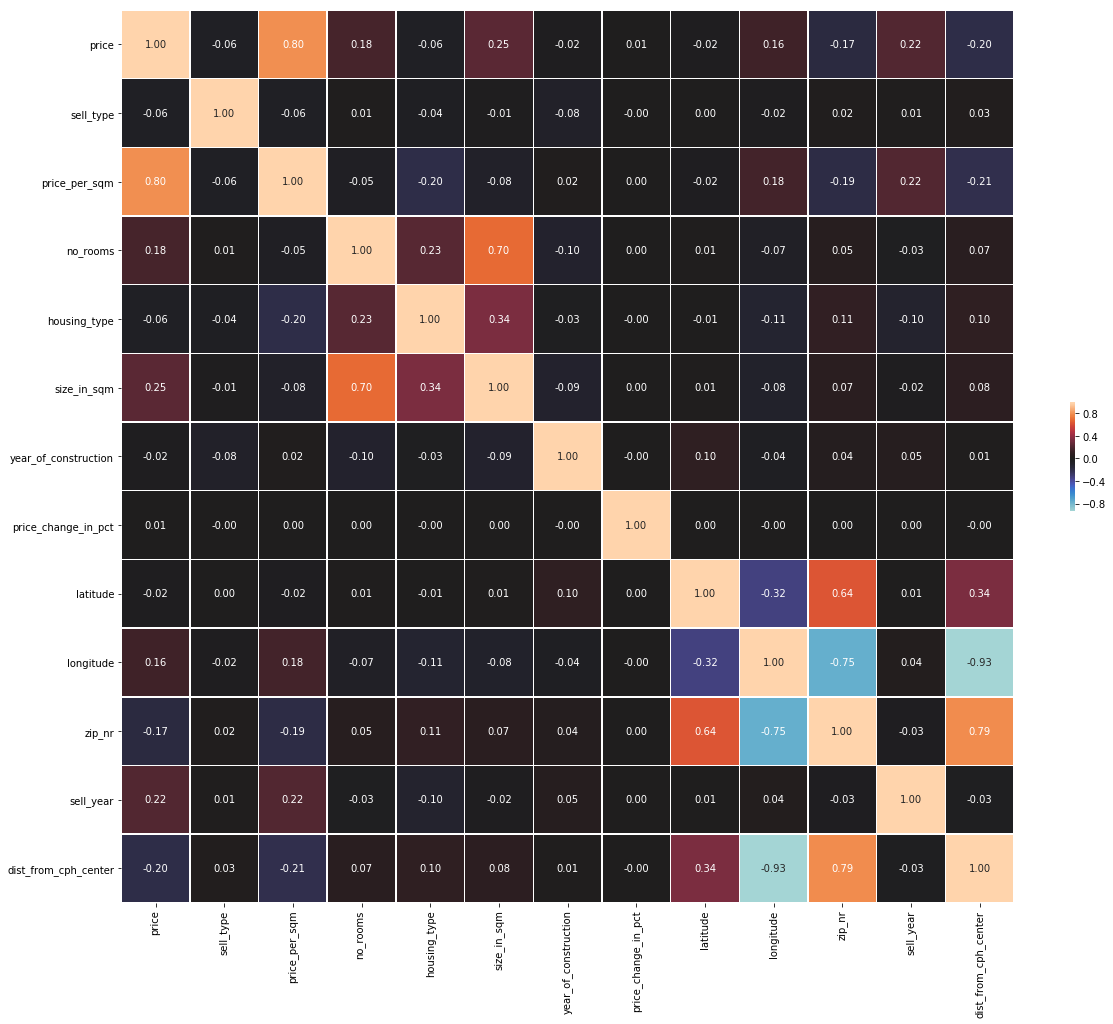

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .10})
plt.show();

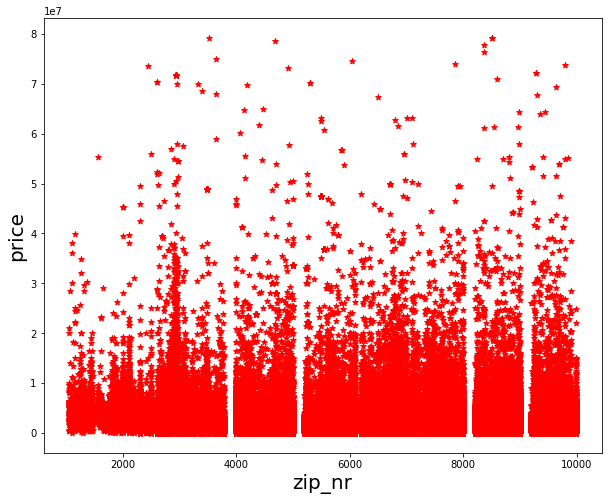

In [18]:
plt.figure(figsize=(10,8))
plt.xlabel('zip_nr' ,fontsize='20')
plt.ylabel('price' ,fontsize='20')
plt.scatter( df['zip_nr'], df['price'],  color='red', marker='*')

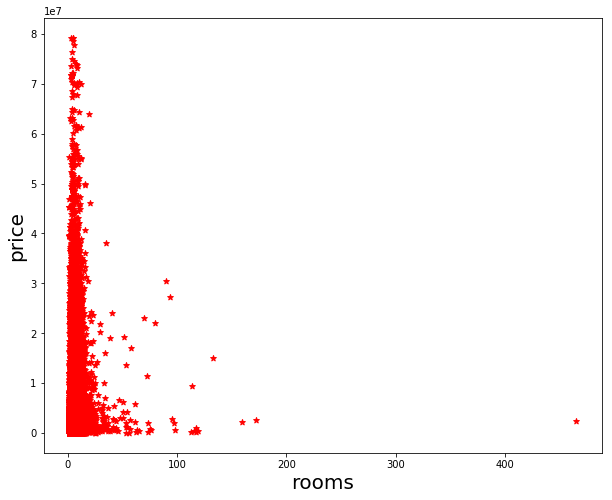

In [19]:
plt.figure(figsize=(10,8))
plt.xlabel('rooms' ,fontsize='20')
plt.ylabel('price' ,fontsize='20')
plt.scatter( df['no_rooms'], df['price'],  color='red', marker='*')

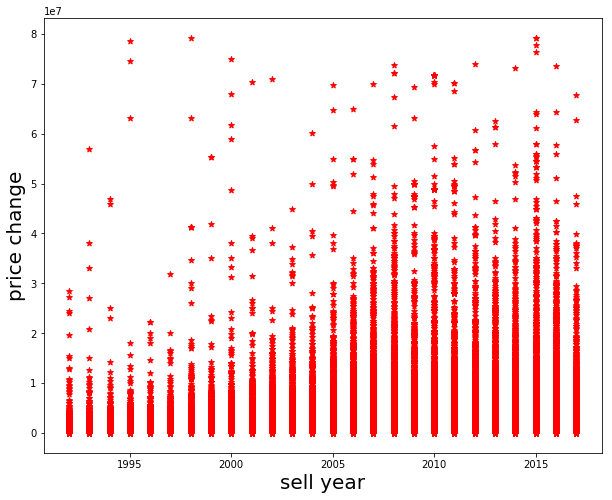

In [20]:
plt.figure(figsize=(10,8))
plt.xlabel('sell year' ,fontsize='20')
plt.ylabel('price change' ,fontsize='20')
plt.scatter( df['sell_year'], df['price'],  color='red', marker='*')

##### We will create another dataframe containing our unmodified data in order to use it for our Business Intelligence plotting later. Cell 18 is basically subtracting the validation dataset from the dataframe. The validation data must have same form as our dataframe to split, train and test. Cell 21 is converting the labels column into numeric values using lambda expression, and cell 22 is filling in missing values with our average (3) from class (1-5) 

In [21]:
# dataframe for BI analysis and df is for machine learning dataframe
biframe = df

In [22]:
df = df[~df.index.isin(validation_xx.index)]

In [23]:
validation_x = validation_xx[['zip_nr','price','no_rooms','year_of_construction','sell_year','housing_type','sell_type']].values

In [24]:
validation_y = validation_y['labels']

In [25]:
df = df.apply(lambda labels :pd.to_numeric(labels, errors='coerce'))

In [26]:
# filling in missing value with 3 (average of labels/class)
df['labels'] = df['labels'].fillna(3)

##### Before splitting our dataset we will assign x,y from our dataframe. As for our inspection and correlation analysis our selected features will be zip_nr,price,no_rooms,year_of_construction,sell_year,housing_type,sell_type and our value to predict/labes are the price_change_in_pct (splitted in 5 classes)

In [27]:
#df['price'] = df.price 
x = df[['zip_nr','price','no_rooms','year_of_construction','sell_year','housing_type','sell_type']].values

In [28]:
y = df['labels'].values

In [29]:
print(x.shape,y.shape)

(1038394, 7) (1038394,)


In [30]:
nan = np.isnan(y).any()
np.isnan(y).sum()
print(nan)

False


# Part 2: ML model selection and construction

##### We have chosen Logistic regression, Decision Tree and K nearst neighbors for our analysis. Next step is to split the data into training and test set. We will split in ration 20% test and 80% training

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [32]:
print(len(x_train), len(y_train),len(x_test), len(y_test) )

830715 830715 207679 207679


### The model is instantiated and assigned to variables

In [33]:
# four models
model_dt = tree.DecisionTreeClassifier(max_depth = 3)
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier()

# Part 3: Training & Validation

##### The model is trained with the training data

##### The trained models is tested with our test data and it shows that the decision tree classifier has the highest score 82% among the selected models 

In [34]:
#logistic regression
model_lr.fit(x_train,y_train)
model_lr.score(x_test,y_test)
print(model_lr.score(x_test,y_test))

C:\Users\yosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.731003134645294


In [35]:
# decision tree
model_dt.fit(x_train, y_train)
y_predict_tree = model_dt.predict(x_test)
print(accuracy_score(y_predict_tree, y_test))

0.8292316507687344


In [36]:
# K nearst neighbour
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train,y_train) 
print(model_knn.score(x_test,y_test))

0.7543083316079141


In [37]:
p = random.choice(validation_x)

In [38]:
p

array([3.500e+03, 2.805e+06, 4.000e+00, 1.964e+03, 2.014e+03, 3.500e+01,
       1.000e+00])

In [39]:
model_dt.predict(p.reshape(1,-1))[0]

2.0

##### Predicting our model with validation data. The labels are given the values of 1-5 and the validation dataset is fed to the model, which will return one single values from the list. The result for the decision tree is showing that it predicts class 3 (sold to claimed price) which means that the house input validation data will be sold to under the standard price. 

In [40]:
# our own criteria we defined in order to test our model
# these must be in same order as the x values we specified earlier
# 1.zip_nr 2.price 3. no_rooms 4.year_of_construction 5. sell_year 6. housing_type 7. sell_type

q = [[5.492e+03, 25.072e+06, 2.000e+00, 1.974e+03, 2.006e+03, 3.500e+01,3.000e+00]]

In [41]:
type(np.array(q))

numpy.ndarray

In [42]:
model_dt.predict(q)[0]

3.0

In [43]:
label = {1:'under -60%', 2:'under 0%',3:'sold to claimed price',4:'sold to overprice',5:'sold to overprice exceeding 100%'}

#decision tree
print('Prediction:%s\nclass:%s'%(label[model_dt.predict(validation_x)[0]],model_dt.predict(validation_x)[0])) 

Prediction:sold to claimed price
class:3.0


In [44]:
# knn
print('Prediction:%s\nclass:%s'%(label[model_knn.predict(validation_x)[0]], model_knn.predict(validation_x)[0]))

Prediction:under 0%
class:2.0


In [45]:
# logistic 
print('Prediction:%s\nclass:%s'%(label[model_lr.predict(validation_x)[0]], model_lr.predict(validation_x)[0]))

Prediction:sold to claimed price
class:3.0


##### Evaluation: Using matrix to evaluate our model performance on housing dataset 

In [46]:
# evaluation metrics
#confusion_matrix(y_test, y_predict_tree)


decisiontreemodel = model_dt.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_predict_tree)


def display_confusion(confmat):
    
    fig, ax = plt.subplots(figsize=(9.8, 9.8))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
                    s=confmat[i, j],
                    va='center', ha='center')

            plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()


In [47]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[     0    208    342      0      0]
 [     0  46698   5705      0      0]
 [     0  27337 125516      0      0]
 [     0   1387    426      0      0]
 [     0     22     38      0      0]]
Normalized confusion matrix
[[0.   0.38 0.62 0.   0.  ]
 [0.   0.89 0.11 0.   0.  ]
 [0.   0.18 0.82 0.   0.  ]
 [0.   0.77 0.23 0.   0.  ]
 [0.   0.37 0.63 0.   0.  ]]


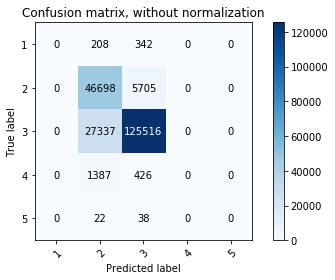

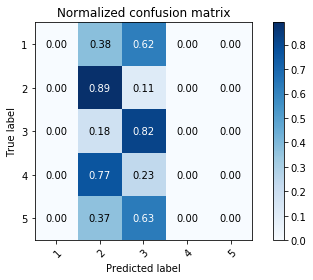

In [48]:
np.set_printoptions(precision=2)
cls = [1,2,3,4,5]
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_predict_tree, classes=cls,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_predict_tree, classes=cls, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [49]:
len(df)

1038394

##### The method above is plotting a Confusion matrix generated by the imported class confusion_matrix. Confusion matrix is to evalute the model performance on x_test and the predicted y outcome. It is to measure how well did the model perform with our test data. The results of the matrix shows that the true positives (which essentially is the important one) has the value of 125516. It litterally means that it predicted class 3 correctly with the true label. Another true positive is the class 1 which true label has been correctly predicted. True positive for class 2 (number 1 in the matrix) is 46698  

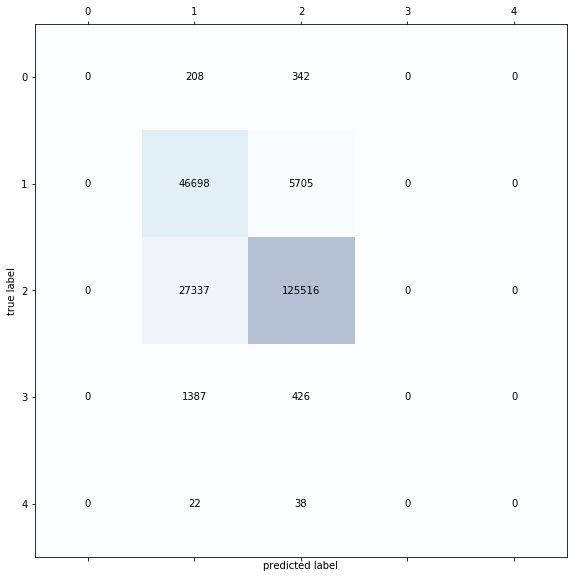

In [50]:
display_confusion(confmat)

### Accuracy, Precision, and Recall

In [51]:
#Accuracy score (decision tree)
print(accuracy_score(y_test, y_predict_tree))

0.8292316507687344


##### Recall shows when true value of eg. class 3.0 how many times did it predict class 3.0. For this case it is 82% of the prediction was the actual true label. Precision is explaining how many times did it predict the correct value of 3.0. The recall for class 2 is 89% and has the highest score. Precision for class 3.0 is 95%. The accuracy score mentioned earlier is 82%. The confusion matrix and the accuracy score should in this case be used with some caution as our dataset is imbalaned, and could favour a more biased prediction towards class 3 in which it is normal as the majority of the house sold is to the actual claimed price.  

In [52]:
print(classification_report(y_test, y_predict_tree))

C:\Users\yosuke\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       550
         2.0       0.62      0.89      0.73     52403
         3.0       0.95      0.82      0.88    152853
         4.0       0.00      0.00      0.00      1813
         5.0       0.00      0.00      0.00        60

    accuracy                           0.83    207679
   macro avg       0.31      0.34      0.32    207679
weighted avg       0.86      0.83      0.83    207679



C:\Users\yosuke\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yosuke\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Part 4: Report your findings (BI)

##### To visualize the data we are using folium for plotting the results. The validation data is divided accordingly to 1-5 classes with different colors. Class 3 is green

In [53]:
import folium

my_map = folium.Map(location=[55.88207495748612, 10.636574309440173], zoom_start=7)

for x,y in validation_xx.iterrows():
    if y.labels==1:
        folium.CircleMarker(location=[y.latitude, y.longitude], radius=2, color='blue').add_to(my_map)
    elif y.labels==2:
        folium.CircleMarker(location=[y.latitude, y.longitude], radius=2, color='yellow').add_to(my_map)
    elif y.labels==3:
        folium.CircleMarker(location=[y.latitude, y.longitude], radius=2, color='green').add_to(my_map)
    elif y.labels==4:
        folium.CircleMarker(location=[y.latitude, y.longitude], radius=2, color='purple').add_to(my_map)
    else:
        folium.CircleMarker(location=[y.latitude, y.longitude], radius=2, color='orange').add_to(my_map)     
    
    

my_map.save('ass7dk.html')
my_map

##### Concluding remarks: The results from the model showed a high scoring, but it became apparent that the usefulness was inadequate. This is due to the fact that our dataset is still poor in features and size plus that the labels which we gave 1-5 classes could have been reformulated. So the matter of formulate the business case was equally important for the result. Further the result was also highly affected by the imbalance in the labels. Nevertheless the process of creating dataset, making feature engineering, splitting data, selecting relevant model, training the model and the evaluation of model performance was a huge learning process in Machine learning wheel.    